In [26]:
import pandas as pd

In [27]:
nifty = pd.read_csv('^NSEI.csv')

In [28]:
nifty.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2008-01-01,6136.750000,6165.350098,6109.850098,6144.350098,6144.350098,0.0
1,2008-01-02,6144.700195,6197.000000,6060.850098,6179.399902,6179.399902,0.0
2,2008-01-03,6184.250000,6230.149902,6126.399902,6178.549805,6178.549805,0.0
3,2008-01-04,6179.100098,6300.049805,6179.100098,6274.299805,6274.299805,0.0
4,2008-01-07,6271.000000,6289.799805,6193.350098,6279.100098,6279.100098,0.0


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
nifty.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3964.000000,3964.000000,3964.000000,3964.000000,3964.000000,3.964000e+03
mean,9499.787577,9551.201149,9432.588741,9493.174436,9493.174436,2.034638e+05
std,4743.406762,4754.663122,4724.123998,4740.963359,4740.963359,2.107915e+05
min,2553.600098,2585.300049,2252.750000,2524.199951,2524.199951,0.000000e+00
25%,5536.775146,5569.237549,5487.487426,5531.837646,5531.837646,0.000000e+00
50%,8338.100098,8378.350097,8282.725097,8335.274902,8335.274902,1.741500e+05
75%,11629.287597,11681.199952,11560.475097,11601.175048,11601.175048,2.796500e+05
max,22406.949219,22419.550781,22367.050781,22378.400391,22378.400391,1.811000e+06


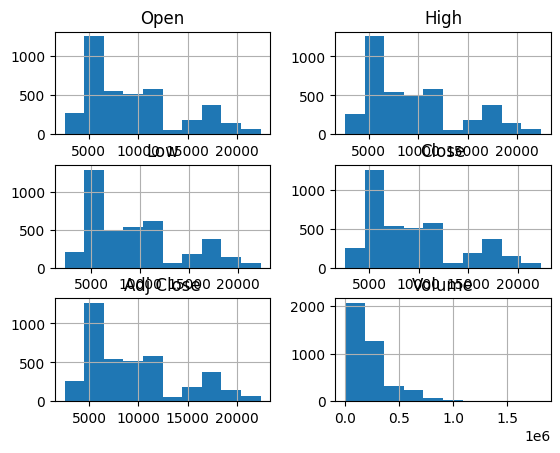

In [31]:
nifty.hist()
plt.show()

<Axes: >

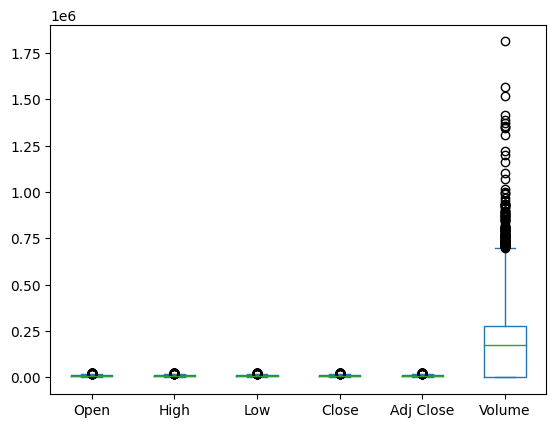

In [32]:
nifty.plot(kind='box')

In [33]:
nifty.set_index(nifty.columns[0], inplace=True)
nifty.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-01-01,6136.750000,6165.350098,6109.850098,6144.350098,6144.350098,0.0
2008-01-02,6144.700195,6197.000000,6060.850098,6179.399902,6179.399902,0.0
2008-01-03,6184.250000,6230.149902,6126.399902,6178.549805,6178.549805,0.0
2008-01-04,6179.100098,6300.049805,6179.100098,6274.299805,6274.299805,0.0
2008-01-07,6271.000000,6289.799805,6193.350098,6279.100098,6279.100098,0.0


In [34]:
nifty.reset_index(inplace=True)

In [35]:
nifty.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2008-01-01,6136.750000,6165.350098,6109.850098,6144.350098,6144.350098,0.0
1,2008-01-02,6144.700195,6197.000000,6060.850098,6179.399902,6179.399902,0.0
2,2008-01-03,6184.250000,6230.149902,6126.399902,6178.549805,6178.549805,0.0
3,2008-01-04,6179.100098,6300.049805,6179.100098,6274.299805,6274.299805,0.0
4,2008-01-07,6271.000000,6289.799805,6193.350098,6279.100098,6279.100098,0.0


In [36]:
nifty.shape

(3994, 7)

In [37]:
ma_100_days = nifty.Close.rolling(100).mean()

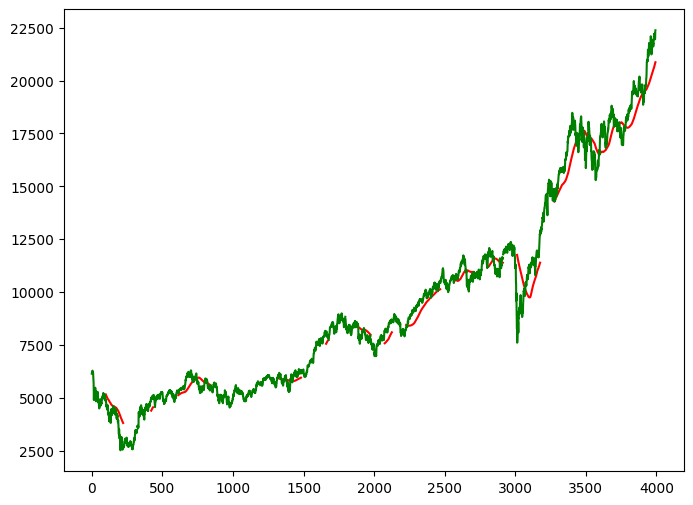

In [38]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(nifty.Close, 'g')
plt.show()

In [39]:
ma_200_days = nifty.Close.rolling(200).mean()

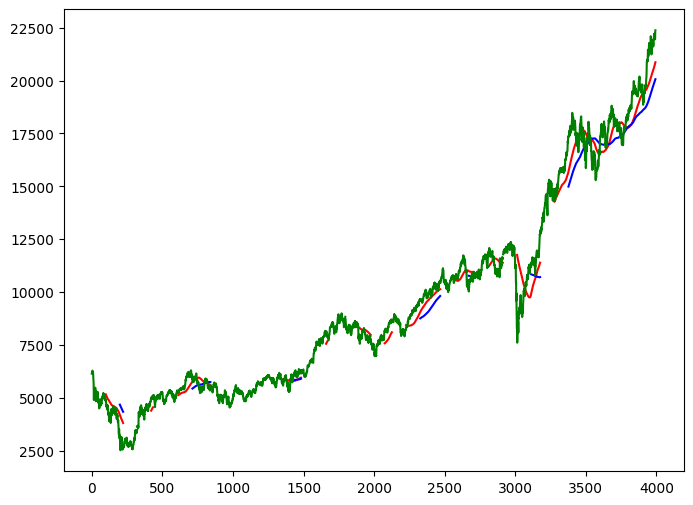

In [40]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days, 'b')
plt.plot(nifty.Close, 'g')
plt.show()

In [41]:
nifty.dropna(inplace=True)

In [42]:
# tuple into dataframe

nifty_train = pd.DataFrame(nifty.Close[0: int(len(nifty)*0.80)])
nifty_test = pd.DataFrame(nifty.Close[int(len(nifty)*0.80): len(nifty)])

In [43]:
nifty_train.shape[0]

3171

In [44]:
nifty_test.shape[0]

793

In [45]:
from sklearn.preprocessing import MinMaxScaler

In [46]:
scaler = MinMaxScaler(feature_range=(0,1))

In [47]:
nifty_train_scale = scaler.fit_transform(nifty_train)

In [48]:
x =[]
y =[]

for i in range(100, nifty_train_scale.shape[0]):
    x.append(nifty_train_scale[i-100:i])
    y.append(nifty_train_scale[i,0])

In [52]:
x,y = np.array(x), np.array(y)

In [53]:
import keras
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [55]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape= ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True ))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation='relu', return_sequences = True ))
model.add(Dropout(0.4))

model.add(LSTM(units = 60, activation='relu' ))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [56]:
model.compile(optimizer  = 'adam', loss = 'mean_squared_error')

In [57]:
model.fit(x,y, epochs = 50, batch_size = 32, verbose = 1)

Epoch 1/50
96/96 [==============================] - 24s 198ms/step - loss: 0.0342
Epoch 2/50
96/96 [==============================] - 18s 188ms/step - loss: 0.0105
Epoch 3/50
96/96 [==============================] - 19s 198ms/step - loss: 0.0088
Epoch 4/50
96/96 [==============================] - 18s 188ms/step - loss: 0.0079
Epoch 5/50
96/96 [==============================] - 21s 218ms/step - loss: 0.0076
Epoch 6/50
96/96 [==============================] - 18s 192ms/step - loss: 0.0065
Epoch 7/50
96/96 [==============================] - 19s 199ms/step - loss: 0.0063
Epoch 8/50
96/96 [==============================] - 18s 188ms/step - loss: 0.0054
Epoch 9/50
96/96 [==============================] - 19s 197ms/step - loss: 0.0055
Epoch 10/50
96/96 [==============================] - 18s 188ms/step - loss: 0.0052
Epoch 11/50
96/96 [==============================] - 19s 196ms/step - loss: 0.0049
Epoch 12/50
96/96 [==============================] - 18s 186ms/step - loss: 0.0045
Epoch 13/50
9

In [58]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_3 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_4 (LSTM)               (None, 60)               

In [60]:
pas_100_days = nifty_train.tail(100)

In [63]:
nifty_test = pd.concat([pas_100_days, nifty_test], ignore_index = True)

In [67]:
nifty_test_scale = scaler.fit_transform(nifty_test)

In [69]:
x =[]
y =[]

for i in range(100, nifty_train_scale.shape[0]):
    x.append(nifty_train_scale[i-100:i])
    y.append(nifty_train_scale[i,0])
x,y = np.array(x),np.array(y)

In [70]:
y_predict = model.predict(x)

96/96 [==============================] - 7s 62ms/step


In [80]:
scale = 1/scaler.scale_

In [81]:
y_predict = y_predict*scale

In [82]:
y = y*scale

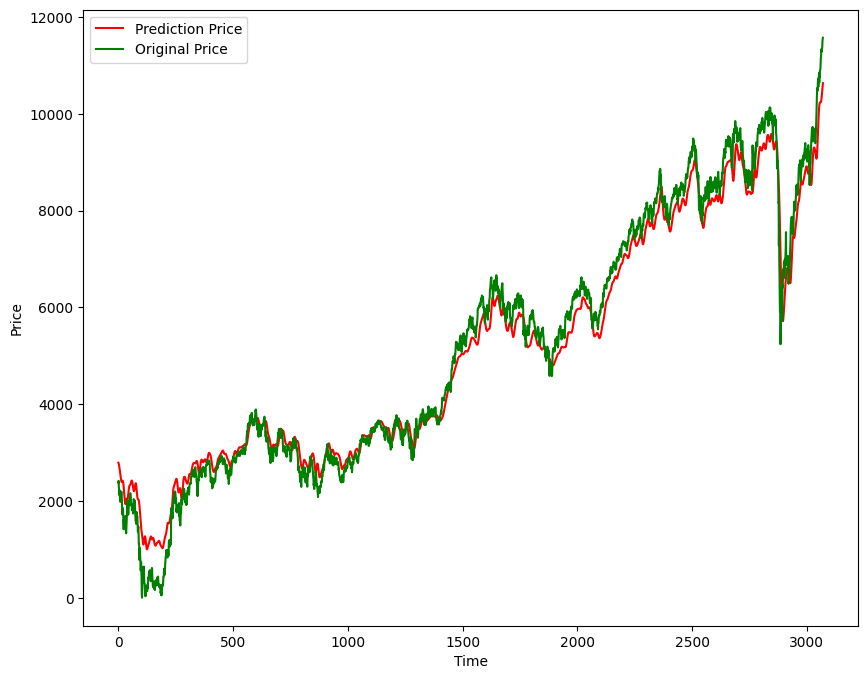

In [83]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label='Prediction Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


In [84]:
model.save('Stock Predictions Model.keras')